In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ML TEMPLETES\hands-on-time-series-analylsis-python-master\Data\Dow_Jones_Industrial_Average.csv', parse_dates= True)

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
1,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000
2,2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000
3,2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000
4,2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000
5,2016-01-22,15921.099609,16136.790039,15921.099609,16093.509766,16093.509766,145850000
6,2016-01-25,16086.459961,16086.459961,15880.150391,15885.219727,15885.219727,123250000
7,2016-01-26,15893.160156,16185.790039,15893.160156,16167.230469,16167.230469,118210000
8,2016-01-27,16168.740234,16235.030273,15878.299805,15944.459961,15944.459961,138350000
9,2016-01-28,15960.280273,16102.139648,15863.719727,16069.639648,16069.639648,130120000


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.count()

Date         1006
Open         1006
High         1006
Low          1006
Close        1006
Adj Close    1006
Volume       1006
dtype: int64

In [7]:
df = df[(df['Date'] > '2016-01-14') & (df['Date'] <= '2017-01-30')]

In [8]:
df.count()

Date         262
Open         262
High         262
Low          262
Close        262
Adj Close    262
Volume       262
dtype: int64

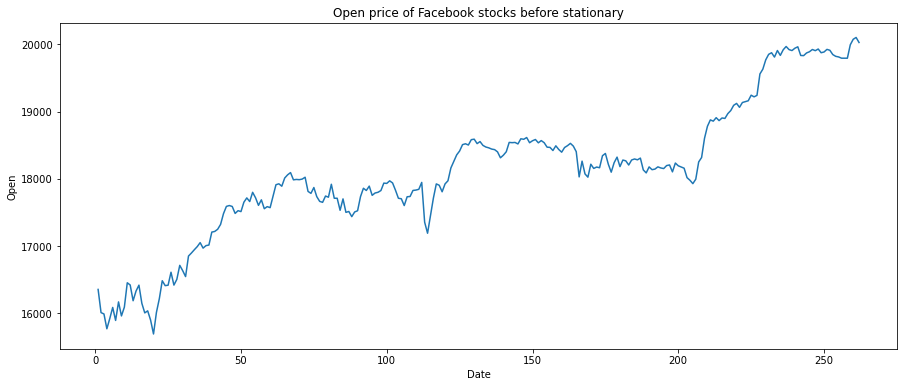

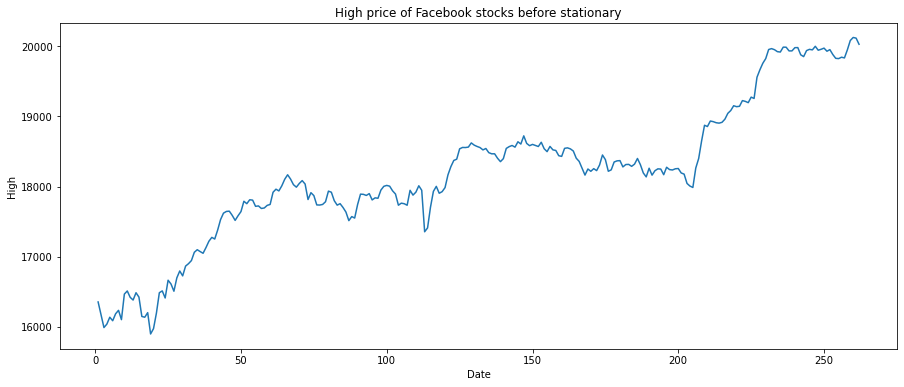

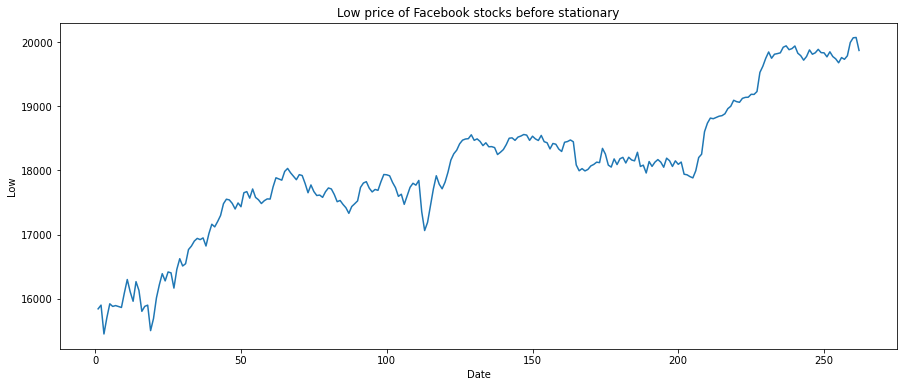

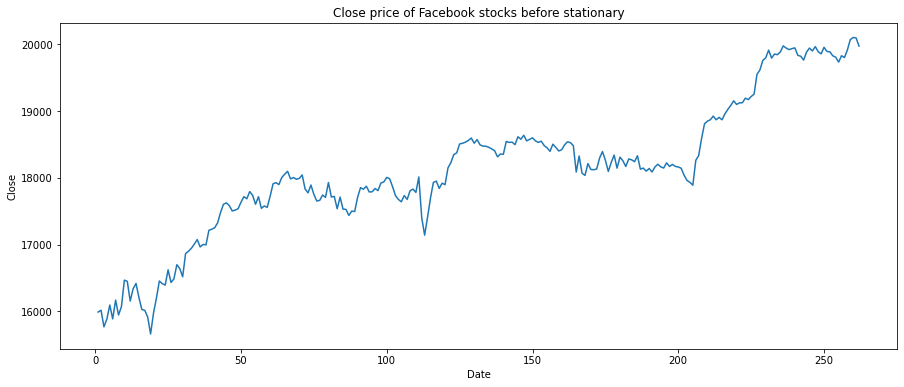

In [9]:
for c in df[['Open', 'High', 'Low', 'Close']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks before stationary")
    plt.show()

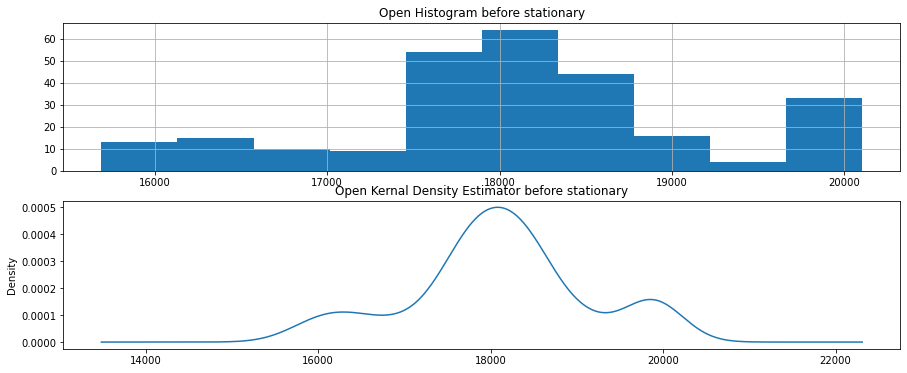

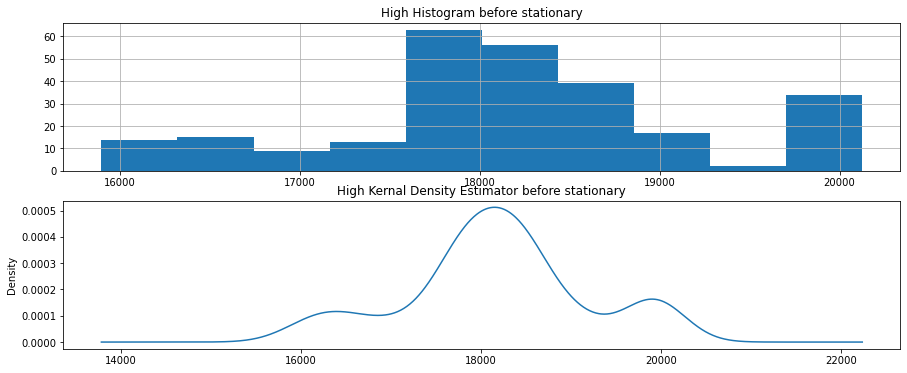

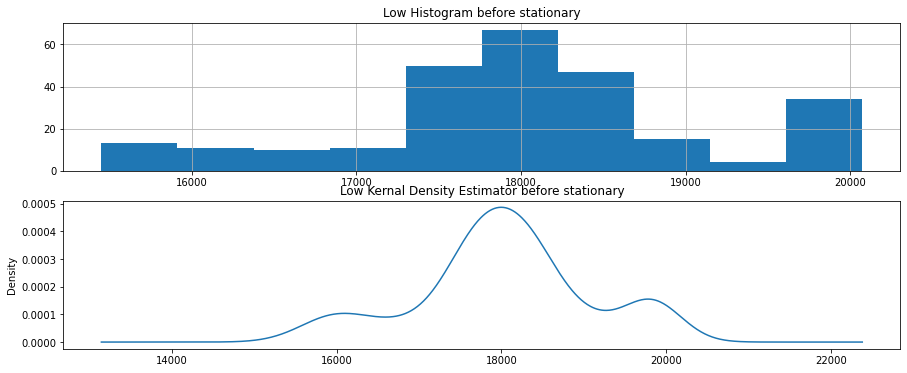

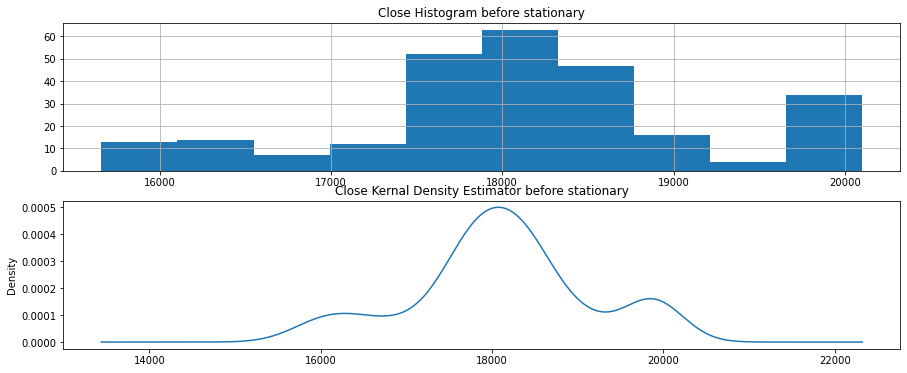

In [10]:
for c in df[['Open', 'High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

In [11]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return 

In [12]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [13]:
for name, column in df[['Open', 'High', 'Low', 'Close']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                  -0.776223
p-value                          0.826007
No Lags Used                     0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                  -1.240162
p-value                          0.656085
No Lags Used                     2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                  -0.981046
p-value                          0.760114
No L

In [14]:
X = df[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

In [15]:
train.count()

Open     232
High     232
Low      232
Close    232
dtype: int64

In [16]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [17]:
for name, column in train_diff[['Open', 'High', 'Low', 'Close' ]].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                -1.579687e+01
p-value                        1.085613e-28
No Lags Used                   0.000000e+00
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                -1.172782e+01
p-value                        1.364178e-21
No Lags Used                   1.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                  -3.997846
p-value                          0.001422


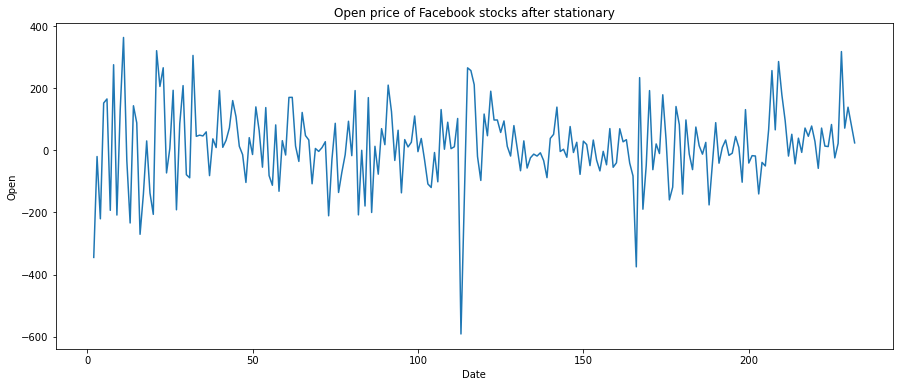

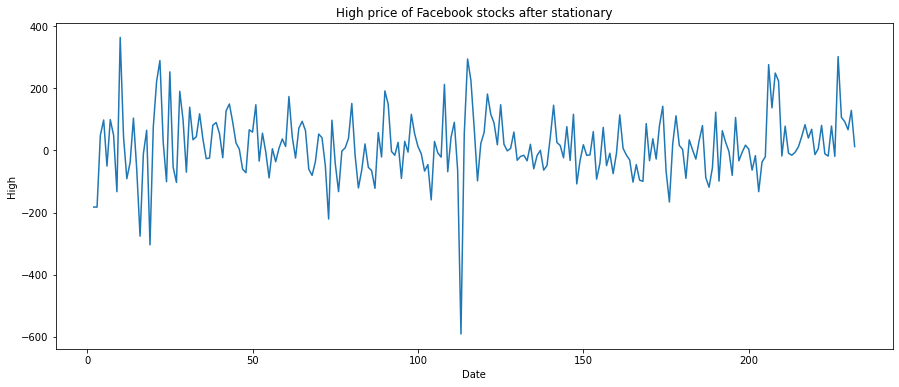

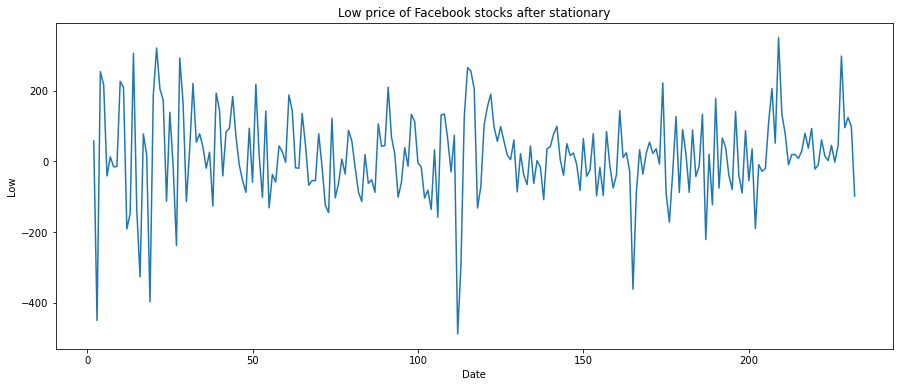

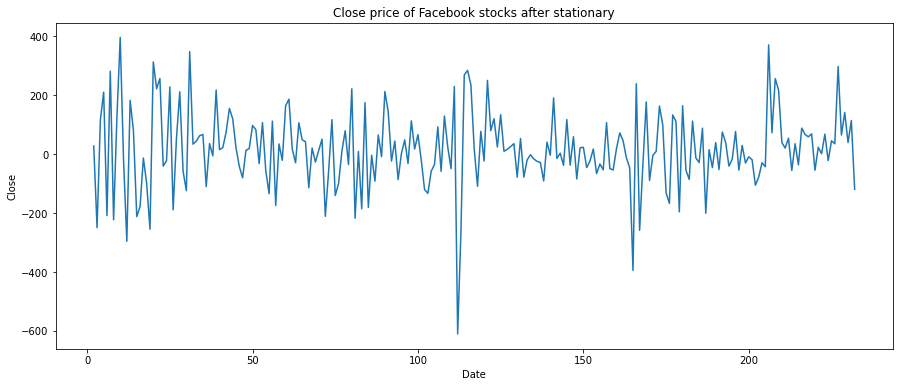

In [18]:
for c in train_diff[['Open', 'High', 'Low', 'Close']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks after stationary")
    plt.show()

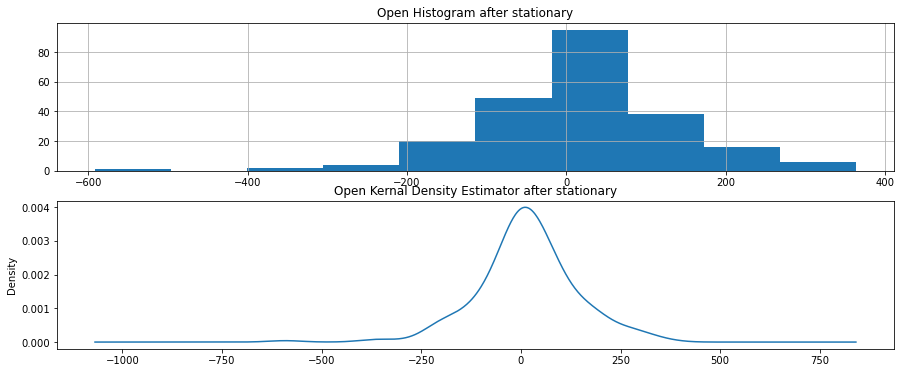

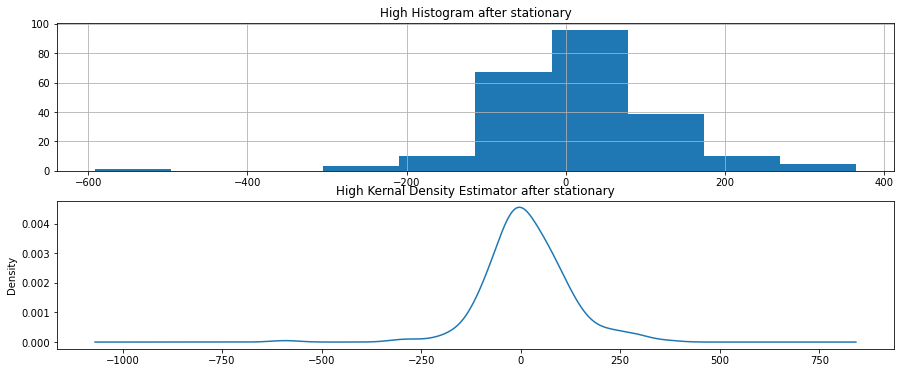

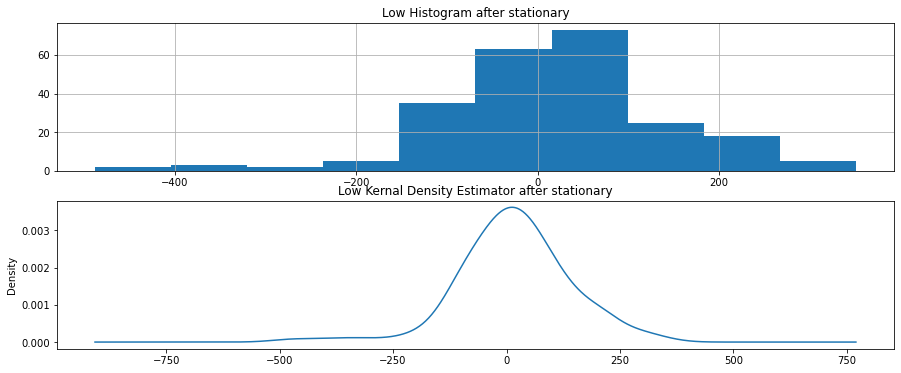

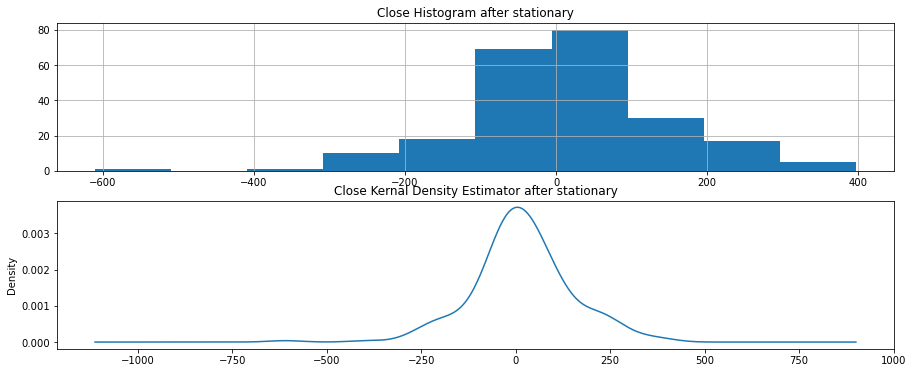

In [19]:
for c in train_diff[['Open', 'High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [20]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [21]:
cointegration_test(train_diff[['Open', 'High', 'Low', 'Close']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Open   >  311.57    > 40.1749   =>   True
High   >  201.62    > 24.2761   =>   True
Low    >  102.52    > 12.3212   =>   True
Close  >  32.21     > 4.1296    =>   True


In [22]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  32.33907657947465, BIC: 32.63803999764189
Order : 2, AIC:  31.801631080906866, BIC: 32.34143017316867
Order : 3, AIC:  31.548769661837937, BIC: 32.33090112107316
Order : 4, AIC:  31.529049396699726, BIC: 32.55502561339019
Order : 5, AIC:  31.536096482336294, BIC: 32.80744577410122
Order : 6, AIC:  31.572569230449275, BIC: 33.09083607587346
Order : 7, AIC:  31.5950147196233, BIC: 33.361759996476806
Order : 8, AIC:  31.63403809689653, BIC: 33.65083932484601
Order : 9, AIC:  31.660078718842303, BIC: 33.92853030675716


In [23]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [24]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['Open', 'High', 'Low', 'Close' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['Open', 'High', 'Low', 'Close'  ])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Apr, 2021
Time:                     13:36:46
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    32.5550
Nobs:                     227.000    HQIC:                   31.9430
Log likelihood:          -4798.94    FPE:                4.93606e+13
AIC:                      31.5290    Det(Omega_mle):     3.69764e+13
--------------------------------------------------------------------
Results for equation Open
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            3.203119         2.016085            1.589           0.112
L1.Open         -0.680835         0.102210           -6.661           0.000
L1.High         -0.089930         0.048603           -1.850           0.064
L1.Lo

In [25]:
df_pred["new_index"] = range(233, 263)
df_pred = df_pred.set_index("new_index")

In [26]:
df_pred

,Open,High,Low,Close
new_index,,,,
233,-88.065500,-95.117550,-62.425255,-10.727882
234,-5.772303,-11.205045,15.521340,-13.508886
235,-0.434844,38.496234,31.424223,64.707119
236,51.606931,41.327721,32.770536,14.358589
237,20.084552,15.328065,27.850804,20.123736
238,16.079684,6.367302,4.332415,6.375142
239,9.024404,18.392106,19.340173,28.261694
240,26.551602,23.170814,20.891955,14.004266
241,14.301531,12.392754,13.298405,10.142103


In [27]:
res = inverse_diff(df[['Open', 'High', 'Low', 'Close' ]],df_pred)

In [28]:
res

,Open,High,Low,Close,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff
new_index,,,,,,,,
233,-88.065500,-95.117550,-62.425255,-10.727882,19940.553641,19933.501591,19807.965370,19960.402977
234,-5.772303,-11.205045,15.521340,-13.508886,19934.781338,19922.296546,19823.486710,19946.894090
235,-0.434844,38.496234,31.424223,64.707119,19934.346494,19960.792781,19854.910933,20011.601209
236,51.606931,41.327721,32.770536,14.358589,19985.953425,20002.120502,19887.681469,20025.959798
237,20.084552,15.328065,27.850804,20.123736,20006.037977,20017.448567,19915.532272,20046.083533
238,16.079684,6.367302,4.332415,6.375142,20022.117662,20023.815869,19919.864688,20052.458675
239,9.024404,18.392106,19.340173,28.261694,20031.142065,20042.207975,19939.204860,20080.720369
240,26.551602,23.170814,20.891955,14.004266,20057.693668,20065.378789,19960.096816,20094.724635
241,14.301531,12.392754,13.298405,10.142103,20071.995199,20077.771543,19973.395221,20104.866738


In [29]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for Open
MSE is : 96475.65112756094
MAE is : 272.4111706556735
RMSE is : 310.6052979708507
MAPE is : 1.3697279038876546
R2 is : -14.781846912253274

Evaluation metric for High
MSE is : 76165.26004845941
MAE is : 233.39439510820145
RMSE is : 275.98054288021723
MAPE is : 1.1709231240570428
R2 is : -12.685191698127158

Evaluation metric for Low
MSE is : 84415.1948587162
MAE is : 239.85005825950637
RMSE is : 290.54293118008604
MAPE is : 1.210491709905932
R2 is : -8.88509304382242

Evaluation metric for Close
MSE is : 120535.30355185579
MAE is : 312.7798135745031
RMSE is : 347.18194588984
MAPE is : 1.5729127244970422
R2 is : -14.910722704189942



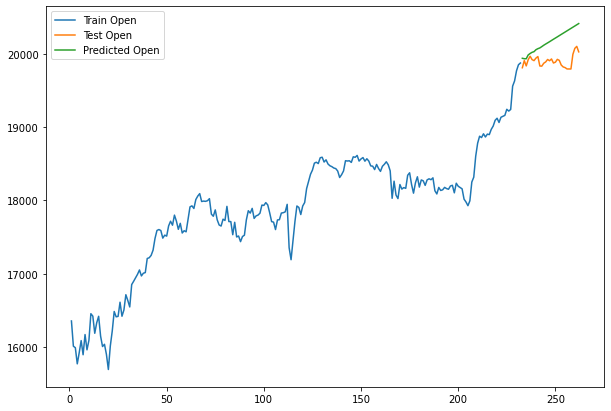

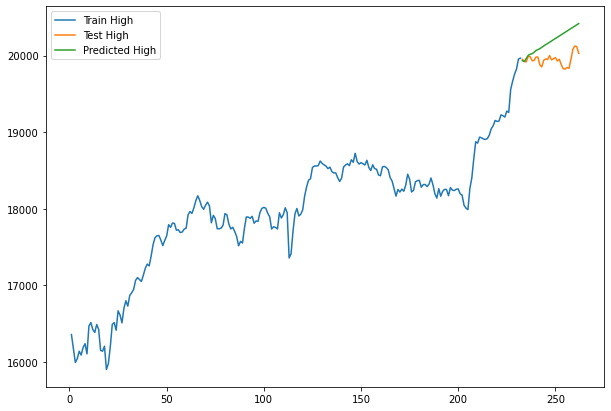

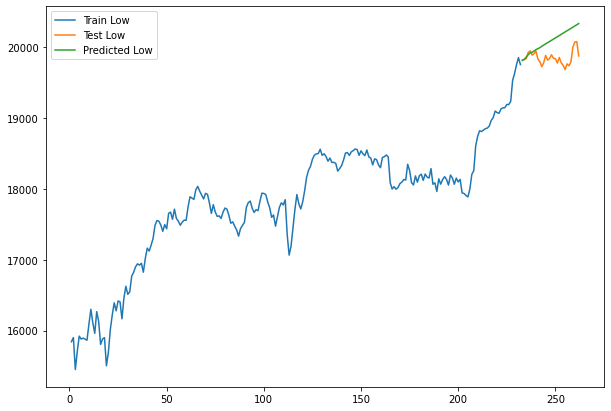

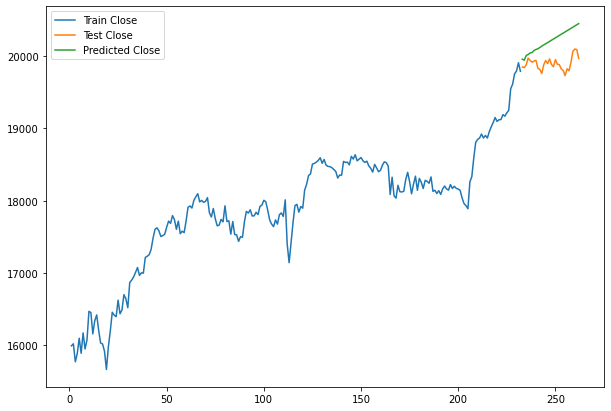

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['Open', 'High', 'Low', 'Close' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()